In [1]:
import tensorflow 
import os
from skimage import io 
from PIL import Image
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Importing and Loading the data into a data frame
dataset_path_train = 'Data/Training/'
dataset_path_test = 'Data/Testing/'
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

In [3]:
## Importing training
training = {}
for i in range(len(class_names)):
    tumor_path_train = os.path.join(dataset_path_train, class_names[i])
    training[class_names[i]+'_train'] = [Image.open(os.path.join(tumor_path_train, image)) for image in os.listdir(tumor_path_train)]

In [4]:
## Importing test
test = {}
for i in range(len(class_names)):
    tumor_path_test = os.path.join(dataset_path_test, class_names[i])
    test[class_names[i]+'_test'] = [Image.open(os.path.join(tumor_path_test, image)) for image in os.listdir(tumor_path_test)]

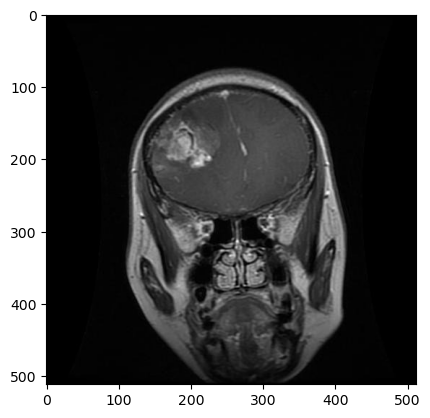

In [5]:
# Test to see if successfully imported
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(training['glioma_train'][0])

In [6]:
# Training to array
for i in range(len(class_names)):
    for j in range(len(training[class_names[i]+'_train'])):
        training[class_names[i]+'_train'][j] = np.array(training[class_names[i]+'_train'][j])

In [7]:
## Test to array
for i in range(len(class_names)):
    for j in range(len(test[class_names[i]+'_test'])):
        test[class_names[i]+'_test'][j] = np.array(test[class_names[i]+'_test'][j])

## Normalise Images

In [8]:
## training set normalising
for i in range(len(class_names)):
    for j in range(len(training[class_names[i]+'_train'])):
        training[class_names[i]+'_train'][j] = (training[class_names[i]+'_train'][j] - np.min(training[class_names[i]+'_train'][j])) / (np.max(training[class_names[i]+'_train'][j]) - np.min(training[class_names[i]+'_train'][j]))

In [9]:
## test set normalising
for i in range(len(class_names)):
    for j in range(len(test[class_names[i]+'_test'])):
        test[class_names[i]+'_test'][j] = (test[class_names[i]+'_test'][j] - np.min(test[class_names[i]+'_test'][j])) / (np.max(test[class_names[i]+'_test'][j]) - np.min(test[class_names[i]+'_test'][j]))

## Augmenting Data:

In [10]:
new_training = training

### Flipping

In [11]:
for i in range(len(class_names)):
    for j in range(len(training[class_names[i]+'_train'])):
        new_training[class_names[i]+'_train'].append(np.fliplr(training[class_names[i]+'_train'][j]))
        new_training[class_names[i]+'_train'].append(np.flipud(training[class_names[i]+'_train'][j]))

### Noise

In [13]:
for i in range(len(class_names)):
    for j in range(len(training[class_names[i]+'_train'])):
        gaussian = np.random.normal(0, 1, training[class_names[i]+'_train'][j].shape)
        n2 = np.clip((training[class_names[i]+'_train'][j] + gaussian*0.2),0,1)
        new_training[class_names[i]+'_train'].append(n2)

MemoryError: Unable to allocate 2.00 MiB for an array with shape (512, 512) and data type float64

### Rotation

In [ ]:
for i in range(len(class_names)):
    for j in range(len(training[class_names[i]+'_train'])):
        new_training[class_names[i]+'_train'].append(training[class_names[i]+'_train'][j].rotate(90))
        new_training[class_names[i]+'_train'].append(training[class_names[i]+'_train'][j].rotate(180))
        new_training[class_names[i]+'_train'].append(training[class_names[i]+'_train'][j].rotate(270))
        

## Back to Image:

In [ ]:
## Array to training
for i in range(len(class_names)):
    for j in range(len(training[class_names[i]+'_train'])):
        new_training[class_names[i]+'_train'][j] = Image.fromarray(training[class_names[i]+'_train'][j])

In [ ]:
## Array to test
for i in range(len(class_names)):
    for j in range(len(test[class_names[i]+'_test'])):
        test[class_names[i]+'_test'][j] = Image.fromarray(test[class_names[i]+'_test'][j])

### Random Cropping

In [ ]:
def random_crop(image):
    cropped_image = tensorflow.image.random_crop(image, size=[300, 300, 3])
    resized = tensorflow.image.resize(cropped_image, (512, 512))
    resized_image_pil = tensorflow.keras.utils.array_to_img(resized)
    return resized_image_pil

In [ ]:
for i in range(len(class_names)):
    for j in range(len(training[class_names[i]+'_train'])):
        for k in range(2):
            new_training[class_names[i]+'_train'].append(random_crop(training[class_names[i]+'_train'][j]))

### Blur

In [ ]:
for i in range(len(class_names)):
    for j in range(len(training[class_names[i]+'_train'])):
        new_training.append(training[class_names[i]+'_train'][j].filter(ImageFilter.BoxBlur(4)))

## Exporting data:

In [ ]:
## Training data
train_path = 'NewData/Training/'
for i range(len(class_names)):
    for j in range(len(training[class_names[i]+'_train'])):
        new_training[class_names[i]+'_train'][j].save(train_path+class_names[i]+'/'+str(j)+'.jpg')

In [ ]:
## Test data
test_path = 'NewData/Testing/'
for i range(len(class_names)):
    for j in range(len(test[class_names[i]+'_train'])):
        test[class_names[i]+'_test'][j].save(test_path+class_names[i]+'/'+str(j)+'.jpg')